In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import plot_date

In [4]:
data = pd.read_csv("DataSetViana/Variados/Polar_H10_AD655A21_20240917_064124_RR.txt", sep=';')
rr = data['RR-interval [ms]'].to_numpy()
rr_ = rr[50:300]

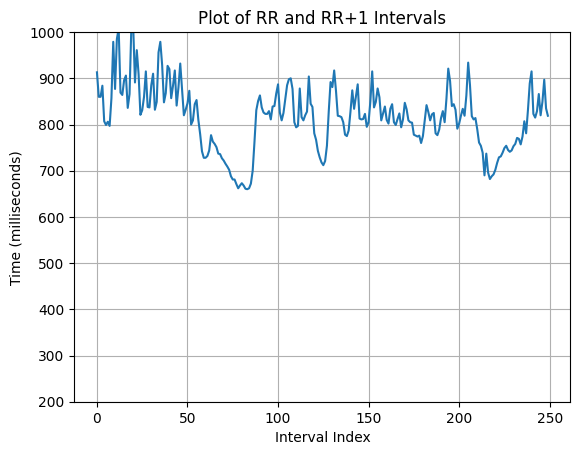

In [9]:
plt.plot(rr_)
plt.title('Plot of RR and RR+1 Intervals')  
plt.xlabel('Interval Index')
plt.ylabel('Time (milliseconds)')
plt.ylim(200, 1000)  # Definir o limite do eixo Y entre 0 e 1000
plt.grid(True)

In [ ]:

# Derivada da posição
Der_V1 = np.diff(rr_)

# Aceleração (segunda derivada da posição)
Ace_V1 = np.diff(Der_V1)

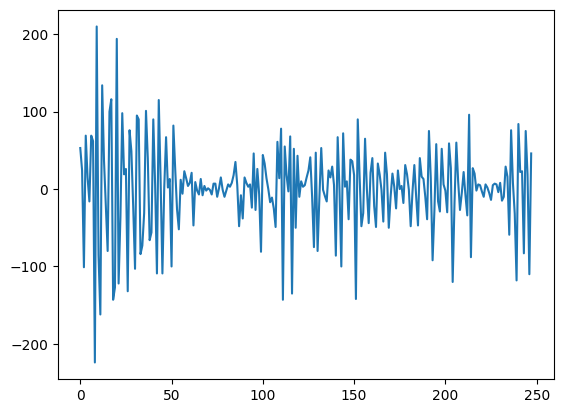

In [13]:
plt.plot(Ace_V1)


In [ ]:

# Cálculo da diferença da derivada
DIFFDER = np.diff(rr_)

# Magnitude absoluta da diferença
ABSDIFFF = np.abs(DIFFDER)

# Integral acumulada da magnitude da derivada
INT_V11ENERG = np.cumsum(ABSDIFFF * ABSDIFFF)

# Diferença da integral acumulada multiplicada por 3
INT_V11ENERGDIFF = np.diff(INT_V11ENERG) * 3

# Integral acumulada da derivada da energia
INT_V11ENERGDERCUM = np.cumsum(INT_V11ENERGDIFF * 8)

# Derivada ponderada pela inclinação
Ace_V1h = np.diff(Der_V1 * np.cos(np.arctan(Der_V1)))

# Constantes
A0 = 0.25
A1 = 0.5
A2 = 0.25

# Cálculo final do PIDA
PIDA = (A0 * Ace_V1 + A1 * INT_V11ENERGDERCUM + A2 * Ace_V1h) / 250

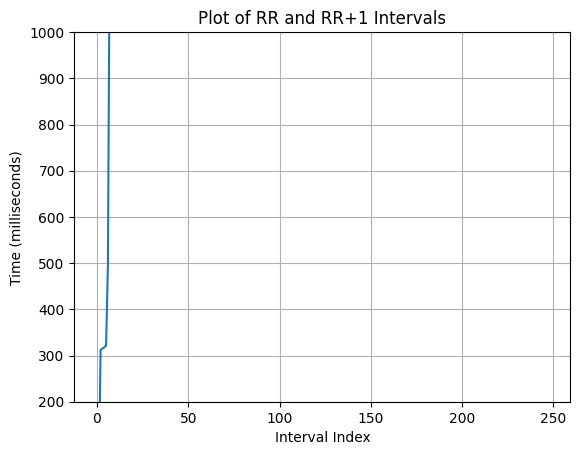

In [12]:

plt.plot(PIDA)
plt.title('Plot of RR and RR+1 Intervals')  
plt.xlabel('Interval Index')
plt.ylabel('Time (milliseconds)')
plt.ylim(200, 1000)  # Definir o limite do eixo Y entre 0 e 1000
plt.grid(True)